In [1]:
!uv add matplotlib

Resolved 12 packages in 0.44ms
Audited 11 packages in 0.00ms


In [20]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

with open('../benchmark/result.json', 'r') as f:
    data = json.load(f)

# JSON ファイルを読み込む（ファイル名は適宜変更してください）
with open('../benchmark/result_100.json', 'r') as f:
    data |= json.load(f)

data = {k: v for k, v in data.items() if v['length'] != 10**5}

In [21]:
data.keys()

dict_keys(['random_1_0', 'random_1_1', 'random_1_2', 'random_10_0', 'random_10_1', 'random_10_2', 'random_100_0', 'random_100_1', 'random_100_2', 'random_1000_0', 'random_1000_1', 'random_1000_2', 'random_10000_0', 'random_10000_1', 'random_10000_2', 'random_2000_0', 'random_2000_1', 'random_2000_2', 'random_3000_0', 'random_3000_1', 'random_3000_2', 'random_4000_0', 'random_4000_1', 'random_4000_2', 'random_5000_0', 'random_5000_1', 'random_5000_2', 'random_6000_0', 'random_6000_1', 'random_6000_2', 'random_7000_0', 'random_7000_1', 'random_7000_2', 'random_8000_0', 'random_8000_1', 'random_8000_2', 'random_9000_0', 'random_9000_1', 'random_9000_2', 'duplicated_1_0', 'duplicated_1_1', 'duplicated_1_2', 'duplicated_10_0', 'duplicated_10_1', 'duplicated_10_2', 'duplicated_100_0', 'duplicated_100_1', 'duplicated_100_2', 'duplicated_1000_0', 'duplicated_1000_1', 'duplicated_1000_2', 'duplicated_10000_0', 'duplicated_10000_1', 'duplicated_10000_2', 'duplicated_2000_0', 'duplicated_2000_1',

In [22]:
data

{'random_1_0': {'type': 'random',
  'length': 1,
  'seed': 2699,
  'sample_id': 0,
  'result': {'bubblesort_ascend': 1.5999999999991715e-06,
   'heapsort_ascend': 3.0000000000012655e-06,
   'insertsort_ascend': 8.999999999998592e-07,
   'mergesort_ascend': 5.000000000005e-07,
   'quicksort_ascend': 5.000000000005e-07,
   'selectsort_ascend': 1.1999999999998123e-06}},
 'random_1_1': {'type': 'random',
  'length': 1,
  'seed': 6740,
  'sample_id': 1,
  'result': {'bubblesort_ascend': 1.4999999999997654e-06,
   'heapsort_ascend': 2.6000000000001716e-06,
   'insertsort_ascend': 7.00000000001047e-07,
   'mergesort_ascend': 5.000000000005e-07,
   'quicksort_ascend': 1.0400000000000686e-05,
   'selectsort_ascend': 1.1999999999998123e-06}},
 'random_1_2': {'type': 'random',
  'length': 1,
  'seed': 2549,
  'sample_id': 2,
  'result': {'bubblesort_ascend': 1.6000000000009063e-06,
   'heapsort_ascend': 1.4199999999998936e-05,
   'insertsort_ascend': 1.300000000002688e-06,
   'mergesort_ascend': 

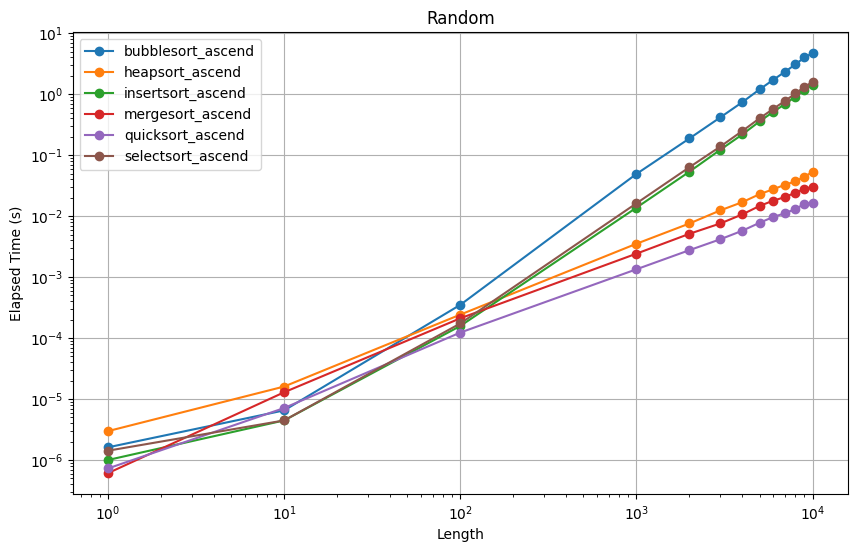

In [26]:
results_by_length = defaultdict(lambda: defaultdict(list))

# "random" タイプのキーのみ処理する
for key, entry in data.items():
    if entry.get("type") != "random":
        continue

    length = entry.get("length")
    # 各アルゴリズムごとの実行時間を格納
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# 各長さについて平均値を計算
lengths = sorted(results_by_length.keys(), key=lambda x: int(x))
algorithms = ["bubblesort_ascend", "heapsort_ascend", "insertsort_ascend",
              "mergesort_ascend", "quicksort_ascend", "selectsort_ascend"]

avg_results = {alg: [] for alg in algorithms}

for length in lengths:
    for alg in algorithms:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_results[alg].append(avg_time)

# グラフ描画
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(lengths, avg_results[alg], marker='o', label=alg)

plt.xlabel("Length")
plt.ylabel("Elapsed Time (s)")
plt.title("Random")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()



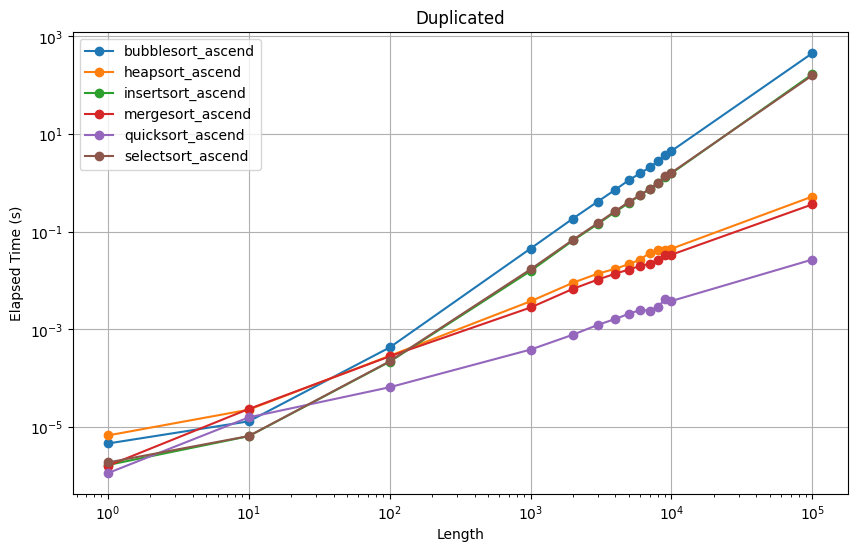

In [17]:
# グループ化用の辞書: {length: {algorithm: [time, ...]}}
results_by_length = defaultdict(lambda: defaultdict(list))

# "random" タイプのキーのみ処理する例
for key, entry in data.items():
    # キー例: "random_1000_0" のようになっているので、
    # entry["type"] が "random" のものを対象とする
    if entry.get("type") != "duplicated":
        continue

    length = entry.get("length")
    # 各アルゴリズムごとの実行時間を格納
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# 各長さについて平均値を計算
lengths = sorted(results_by_length.keys(), key=lambda x: int(x))
algorithms = ["bubblesort_ascend", "heapsort_ascend", "insertsort_ascend",
              "mergesort_ascend", "quicksort_ascend", "selectsort_ascend"]

avg_results = {alg: [] for alg in algorithms}

for length in lengths:
    for alg in algorithms:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_results[alg].append(avg_time)

# グラフ描画
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(lengths, avg_results[alg], marker='o', label=alg)

plt.xlabel("Length")
plt.ylabel("Elapsed Time (s)")
plt.title("Duplicated")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()



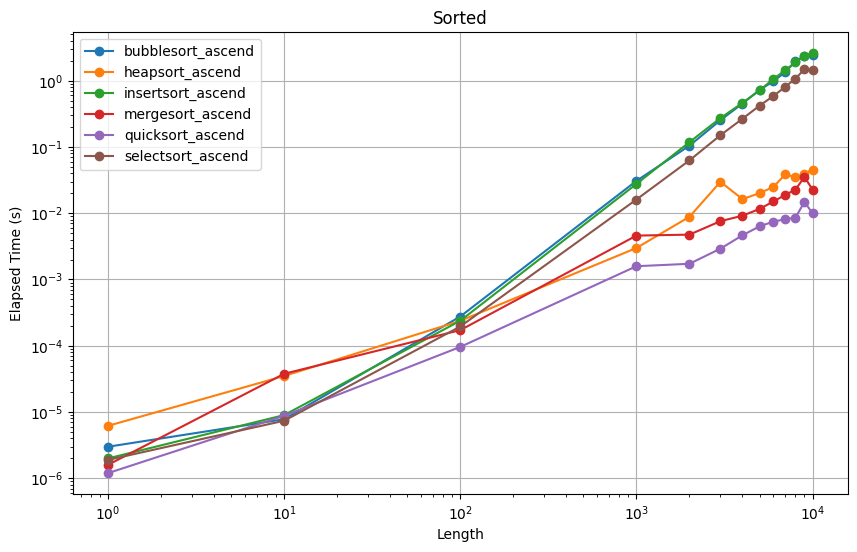

In [32]:
# グループ化用の辞書: {length: {algorithm: [time, ...]}}
results_by_length = defaultdict(lambda: defaultdict(list))

# "random" タイプのキーのみ処理する例
for key, entry in data.items():
    # キー例: "random_1000_0" のようになっているので、
    # entry["type"] が "random" のものを対象とする
    if entry.get("type") != "sorted":
        continue

    length = entry.get("length")
    # 各アルゴリズムごとの実行時間を格納
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# 各長さについて平均値を計算
lengths = sorted(results_by_length.keys(), key=lambda x: int(x))
algorithms = ["bubblesort_ascend", "heapsort_ascend", "insertsort_ascend",
              "mergesort_ascend", "quicksort_ascend", "selectsort_ascend"]

avg_results = {alg: [] for alg in algorithms}

for length in lengths:
    for alg in algorithms:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_results[alg].append(avg_time)

# グラフ描画
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(lengths, avg_results[alg], marker='o', label=alg)

plt.xlabel("Length")
plt.ylabel("Elapsed Time (s)")
plt.title("Sorted")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()



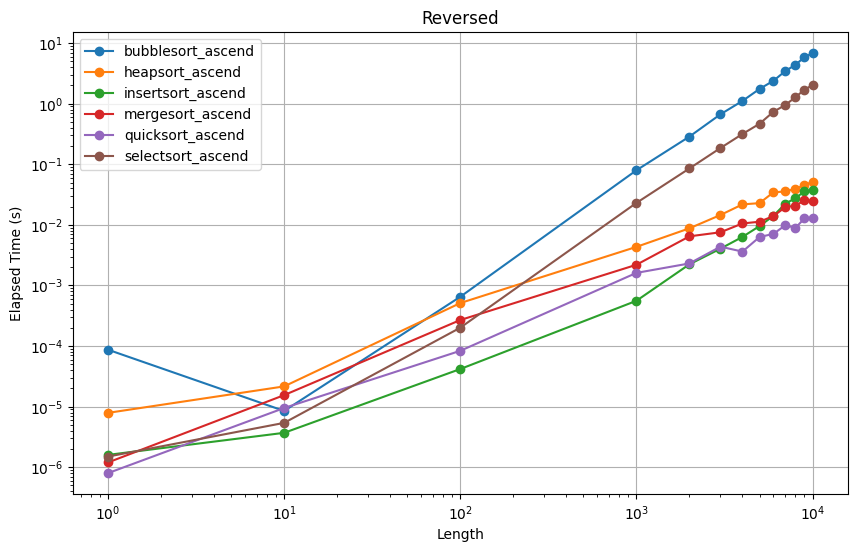

In [36]:
# グループ化用の辞書: {length: {algorithm: [time, ...]}}
results_by_length = defaultdict(lambda: defaultdict(list))

# "random" タイプのキーのみ処理する例
for key, entry in data.items():
    # キー例: "random_1000_0" のようになっているので、
    # entry["type"] が "random" のものを対象とする
    if entry.get("type") != "reverse":
        continue

    length = entry.get("length")
    # 各アルゴリズムごとの実行時間を格納
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# 各長さについて平均値を計算
lengths = sorted(results_by_length.keys(), key=lambda x: int(x))
algorithms = ["bubblesort_ascend", "heapsort_ascend", "insertsort_ascend",
              "mergesort_ascend", "quicksort_ascend", "selectsort_ascend"]

avg_results = {alg: [] for alg in algorithms}

for length in lengths:
    for alg in algorithms:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_results[alg].append(avg_time)

# グラフ描画
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(lengths, avg_results[alg], marker='o', label=alg)

plt.xlabel("Length")
plt.ylabel("Elapsed Time (s)")
plt.title("Reversed")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()



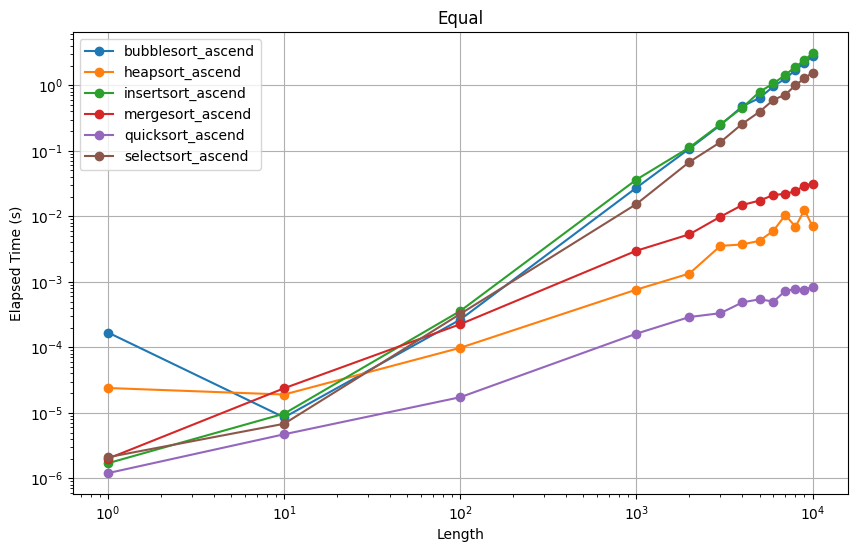

In [35]:
# グループ化用の辞書: {length: {algorithm: [time, ...]}}
results_by_length = defaultdict(lambda: defaultdict(list))

# "random" タイプのキーのみ処理する例
for key, entry in data.items():
    # キー例: "random_1000_0" のようになっているので、
    # entry["type"] が "random" のものを対象とする
    if entry.get("type") != "equal":
        continue

    length = entry.get("length")
    # 各アルゴリズムごとの実行時間を格納
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# 各長さについて平均値を計算
lengths = sorted(results_by_length.keys(), key=lambda x: int(x))
algorithms = ["bubblesort_ascend", "heapsort_ascend", "insertsort_ascend",
              "mergesort_ascend", "quicksort_ascend", "selectsort_ascend"]

avg_results = {alg: [] for alg in algorithms}

for length in lengths:
    for alg in algorithms:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_results[alg].append(avg_time)

# グラフ描画
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(lengths, avg_results[alg], marker='o', label=alg)

plt.xlabel("Length")
plt.ylabel("Elapsed Time (s)")
plt.title("Equal")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()



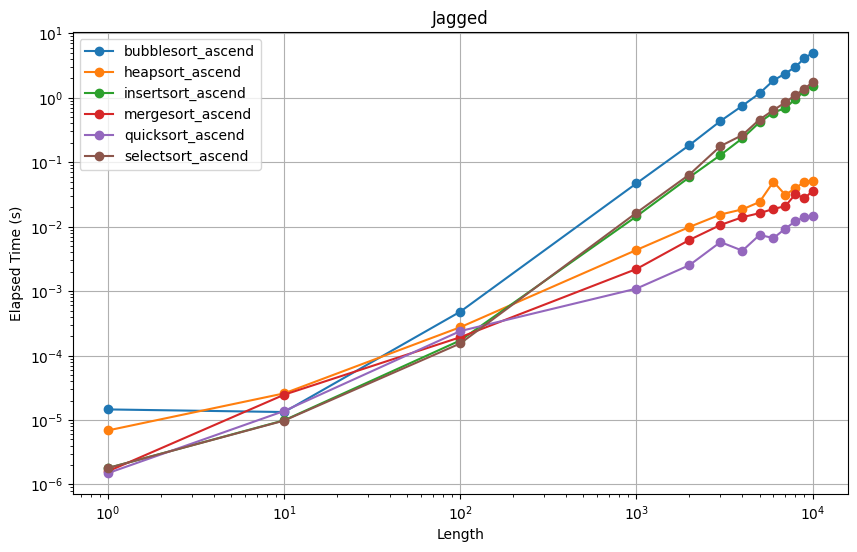

In [37]:
# グループ化用の辞書: {length: {algorithm: [time, ...]}}
results_by_length = defaultdict(lambda: defaultdict(list))

# "random" タイプのキーのみ処理する例
for key, entry in data.items():
    # キー例: "random_1000_0" のようになっているので、
    # entry["type"] が "random" のものを対象とする
    if entry.get("type") != "jag":
        continue

    length = entry.get("length")
    # 各アルゴリズムごとの実行時間を格納
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# 各長さについて平均値を計算
lengths = sorted(results_by_length.keys(), key=lambda x: int(x))
algorithms = ["bubblesort_ascend", "heapsort_ascend", "insertsort_ascend",
              "mergesort_ascend", "quicksort_ascend", "selectsort_ascend"]

avg_results = {alg: [] for alg in algorithms}

for length in lengths:
    for alg in algorithms:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_results[alg].append(avg_time)

# グラフ描画
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(lengths, avg_results[alg], marker='o', label=alg)

plt.xlabel("Length")
plt.ylabel("Elapsed Time (s)")
plt.title("Jagged")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()



In [39]:
!uv add seaborn

Resolved 16 packages in 238ms                                        
Prepared 3 packages in 1.24s                                             
Installed 4 packages in 23ms                                
 + pandas==2.2.3
 + pytz==2025.1
 + seaborn==0.13.2
 + tzdata==2025.1


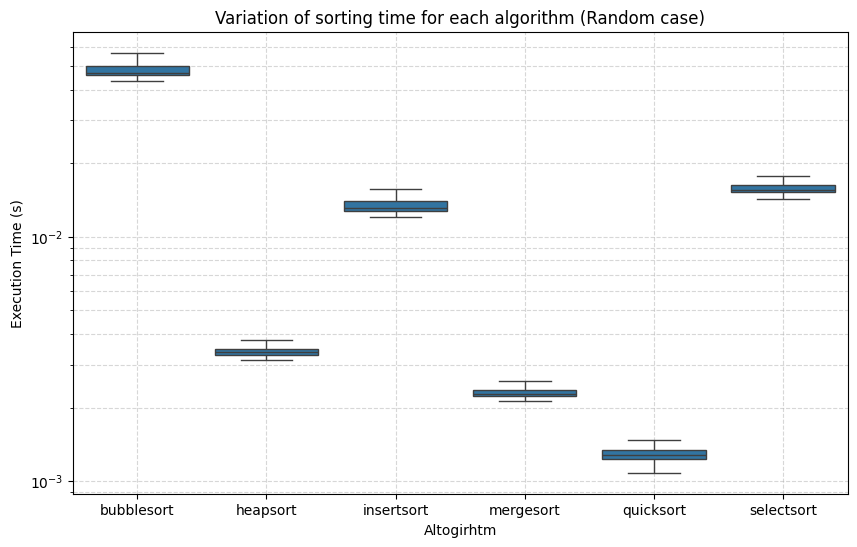

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict

# データから「random」ケースのソート時間を抽出
data_points = []
for key, entry in data.items():
    if entry.get("type") != "random" or entry.get("length") != 1000:
        continue
    length = entry.get("length")
    for alg, time in entry["result"].items():
        # 必要に応じて length も記録しておく（後のフィルタリングなどに利用可能）
        data_points.append({"length": length, "algorithm": alg.replace("_ascend", ""), "time": time})

# DataFrameに変換
df = pd.DataFrame(data_points)

# プロットの作成
plt.figure(figsize=(10, 6))
# 箱ひげ図（外れ値は表示しない）
sns.boxplot(x="algorithm", y="time", data=df, showfliers=False)
# 各データ点を散布（重なりがちな場合はswarmplotでも可）
# sns.stripplot(x="algorithm", y="time", data=df, color='black', alpha=0.7, jitter=True)

plt.xlabel("Altogirhtm")
plt.ylabel("Execution Time (s)")
plt.title("Variation of sorting time for each algorithm (Random case)")
plt.yscale('log')  # 実行時間が非常に小さいので対数スケールで表示
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


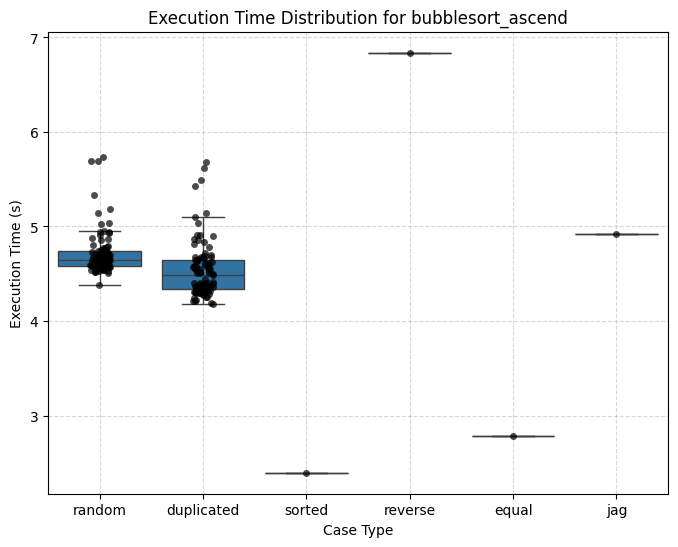

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the target algorithm (e.g., 'quicksort_ascend')
algorithm = 'bubblesort_ascend'

# Define the case types to include
case_types = ["random", "duplicated", "sorted", "reverse", "jag", "equal"]

# Extract data for the specified algorithm and case types
data_points = []
for key, entry in data.items():
    case_type = entry.get("type")
    if entry.get("length") != 10000:
        continue
    if case_type in case_types:
        time = entry["result"].get(algorithm)
        if time is not None:
            data_points.append({
                "case_type": case_type,
                "time": time,
                "case_id": key  # identifier for the case, if needed
            })

# Convert to a DataFrame
df = pd.DataFrame(data_points)

# Create the plot
plt.figure(figsize=(8, 6))
# Boxplot for the overall distribution without outliers
sns.boxplot(x="case_type", y="time", data=df, showfliers=False)
# Overlay individual data points
sns.stripplot(x="case_type", y="time", data=df, color='black', alpha=0.7, jitter=True)

plt.xlabel("Case Type")
plt.ylabel("Execution Time (s)")
plt.title(f"Execution Time Distribution for {algorithm}")
# plt.yscale("log")  # Use log scale for better visibility if times are very small
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


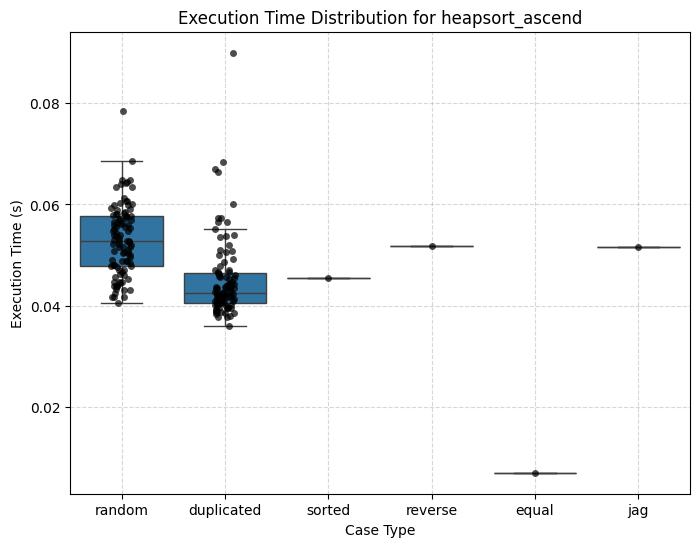

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the target algorithm (e.g., 'quicksort_ascend')
algorithm = 'heapsort_ascend'

# Define the case types to include
case_types = ["random", "duplicated", "sorted", "reverse", "jag", "equal"]

# Extract data for the specified algorithm and case types
data_points = []
for key, entry in data.items():
    case_type = entry.get("type")
    if entry.get("length") != 10000:
        continue
    if case_type in case_types:
        time = entry["result"].get(algorithm)
        if time is not None:
            data_points.append({
                "case_type": case_type,
                "time": time,
                "case_id": key  # identifier for the case, if needed
            })

# Convert to a DataFrame
df = pd.DataFrame(data_points)

# Create the plot
plt.figure(figsize=(8, 6))
# Boxplot for the overall distribution without outliers
sns.boxplot(x="case_type", y="time", data=df, showfliers=False)
# Overlay individual data points
sns.stripplot(x="case_type", y="time", data=df, color='black', alpha=0.7, jitter=True)

plt.xlabel("Case Type")
plt.ylabel("Execution Time (s)")
plt.title(f"Execution Time Distribution for {algorithm}")
# plt.yscale("log")  # Use log scale for better visibility if times are very small
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


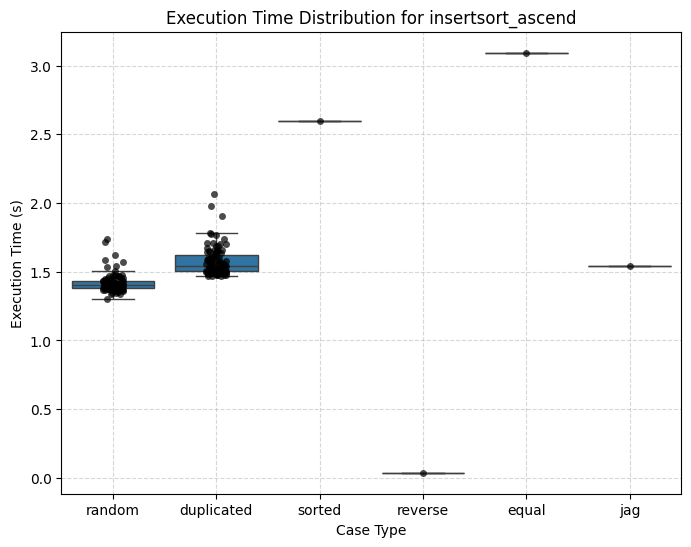

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the target algorithm (e.g., 'quicksort_ascend')
algorithm = 'insertsort_ascend'

# Define the case types to include
case_types = ["random", "duplicated", "sorted", "reverse", "jag", "equal"]

# Extract data for the specified algorithm and case types
data_points = []
for key, entry in data.items():
    case_type = entry.get("type")
    if entry.get("length") != 10000:
        continue
    if case_type in case_types:
        time = entry["result"].get(algorithm)
        if time is not None:
            data_points.append({
                "case_type": case_type,
                "time": time,
                "case_id": key  # identifier for the case, if needed
            })

# Convert to a DataFrame
df = pd.DataFrame(data_points)

# Create the plot
plt.figure(figsize=(8, 6))
# Boxplot for the overall distribution without outliers
sns.boxplot(x="case_type", y="time", data=df, showfliers=False)
# Overlay individual data points
sns.stripplot(x="case_type", y="time", data=df, color='black', alpha=0.7, jitter=True)

plt.xlabel("Case Type")
plt.ylabel("Execution Time (s)")
plt.title(f"Execution Time Distribution for {algorithm}")
# plt.yscale("log")  # Use log scale for better visibility if times are very small
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


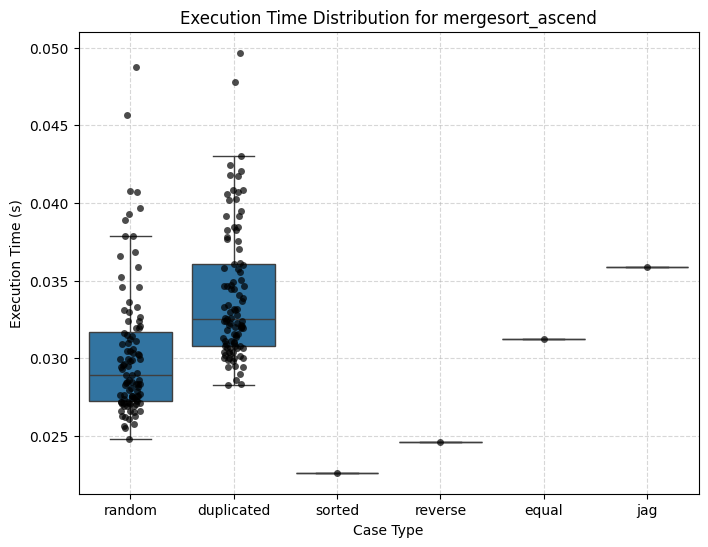

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the target algorithm (e.g., 'quicksort_ascend')
algorithm = 'mergesort_ascend'

# Define the case types to include
case_types = ["random", "duplicated", "sorted", "reverse", "jag", "equal"]

# Extract data for the specified algorithm and case types
data_points = []
for key, entry in data.items():
    case_type = entry.get("type")
    if entry.get("length") != 10000:
        continue
    if case_type in case_types:
        time = entry["result"].get(algorithm)
        if time is not None:
            data_points.append({
                "case_type": case_type,
                "time": time,
                "case_id": key  # identifier for the case, if needed
            })

# Convert to a DataFrame
df = pd.DataFrame(data_points)

# Create the plot
plt.figure(figsize=(8, 6))
# Boxplot for the overall distribution without outliers
sns.boxplot(x="case_type", y="time", data=df, showfliers=False)
# Overlay individual data points
sns.stripplot(x="case_type", y="time", data=df, color='black', alpha=0.7, jitter=True)

plt.xlabel("Case Type")
plt.ylabel("Execution Time (s)")
plt.title(f"Execution Time Distribution for {algorithm}")
# plt.yscale("log")  # Use log scale for better visibility if times are very small
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


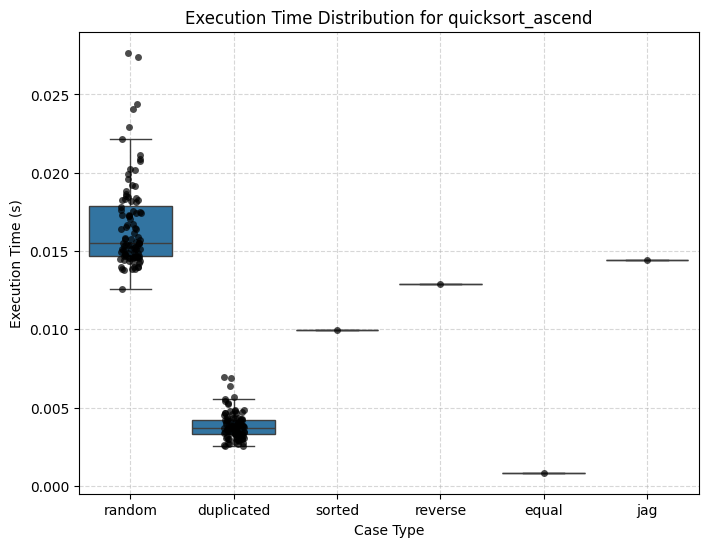

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the target algorithm (e.g., 'quicksort_ascend')
algorithm = 'quicksort_ascend'

# Define the case types to include
case_types = ["random", "duplicated", "sorted", "reverse", "jag", "equal"]

# Extract data for the specified algorithm and case types
data_points = []
for key, entry in data.items():
    case_type = entry.get("type")
    if entry.get("length") != 10000:
        continue
    if case_type in case_types:
        time = entry["result"].get(algorithm)
        if time is not None:
            data_points.append({
                "case_type": case_type,
                "time": time,
                "case_id": key  # identifier for the case, if needed
            })

# Convert to a DataFrame
df = pd.DataFrame(data_points)

# Create the plot
plt.figure(figsize=(8, 6))
# Boxplot for the overall distribution without outliers
sns.boxplot(x="case_type", y="time", data=df, showfliers=False)
# Overlay individual data points
sns.stripplot(x="case_type", y="time", data=df, color='black', alpha=0.7, jitter=True)

plt.xlabel("Case Type")
plt.ylabel("Execution Time (s)")
plt.title(f"Execution Time Distribution for {algorithm}")
# plt.yscale("log")  # Use log scale for better visibility if times are very small
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


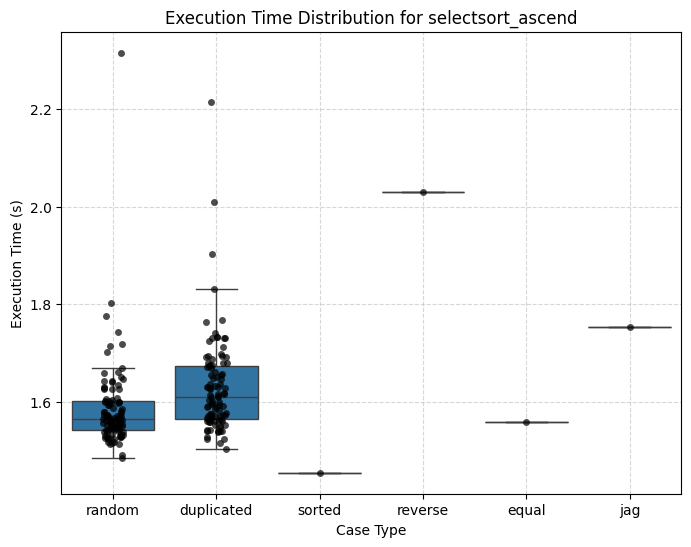

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the target algorithm (e.g., 'quicksort_ascend')
algorithm = 'selectsort_ascend'

# Define the case types to include
case_types = ["random", "duplicated", "sorted", "reverse", "jag", "equal"]

# Extract data for the specified algorithm and case types
data_points = []
for key, entry in data.items():
    case_type = entry.get("type")
    if entry.get("length") != 10000:
        continue
    if case_type in case_types:
        time = entry["result"].get(algorithm)
        if time is not None:
            data_points.append({
                "case_type": case_type,
                "time": time,
                "case_id": key  # identifier for the case, if needed
            })

# Convert to a DataFrame
df = pd.DataFrame(data_points)

# Create the plot
plt.figure(figsize=(8, 6))
# Boxplot for the overall distribution without outliers
sns.boxplot(x="case_type", y="time", data=df, showfliers=False)
# Overlay individual data points
sns.stripplot(x="case_type", y="time", data=df, color='black', alpha=0.7, jitter=True)

plt.xlabel("Case Type")
plt.ylabel("Execution Time (s)")
plt.title(f"Execution Time Distribution for {algorithm}")
# plt.yscale("log")  # Use log scale for better visibility if times are very small
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


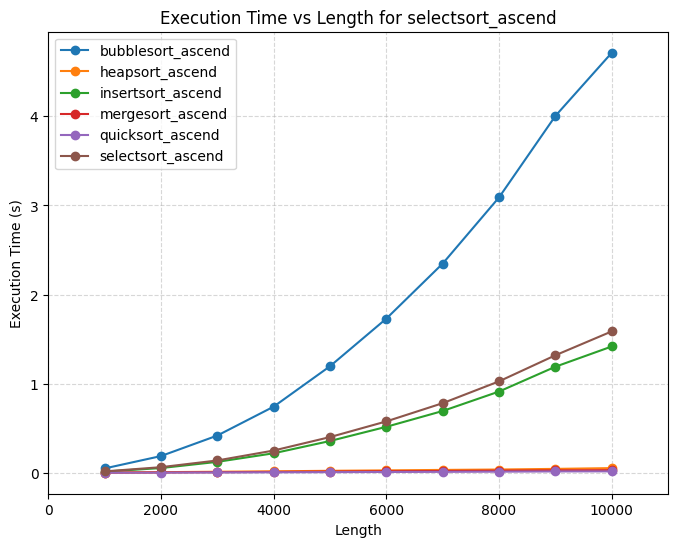

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# List of algorithms to consider
algorithms = ["bubblesort_ascend", "heapsort_ascend", "insertsort_ascend",
              "mergesort_ascend", "quicksort_ascend", "selectsort_ascend"]

# Dictionary to store execution times by length and algorithm
results_by_length = defaultdict(lambda: defaultdict(list))

# Extract only 'random' type entries with length between 10^3 and 10^4
for key, entry in data.items():
    if entry.get("type") != "random":
        continue
    length = entry.get("length")
    if not (1000 <= length <= 10000):
        continue
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# Get sorted list of lengths
lengths = sorted(results_by_length.keys())
plt.figure(figsize=(8, 6))

# Create one graph per algorithm
for alg in algorithms:
    avg_times = []
    for length in lengths:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_times.append(avg_time)
    
    plt.plot(lengths, avg_times, marker='o', label=alg)
plt.xlabel("Length")
plt.ylabel("Execution Time (s)")
plt.xlim(0, 11000)
plt.title(f"Execution Time vs Length for {alg}")
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()


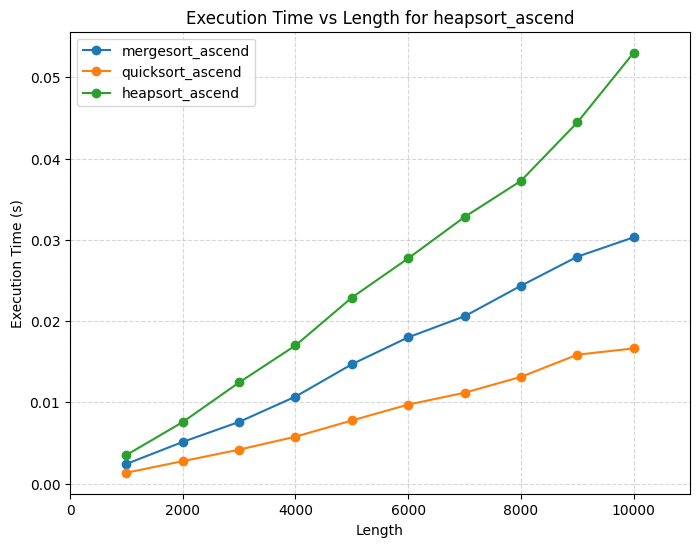

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# List of algorithms to consider
algorithms = [
              "mergesort_ascend", "quicksort_ascend", "heapsort_ascend"]

# Dictionary to store execution times by length and algorithm
results_by_length = defaultdict(lambda: defaultdict(list))

# Extract only 'random' type entries with length between 10^3 and 10^4
for key, entry in data.items():
    if entry.get("type") != "random":
        continue
    length = entry.get("length")
    if not (1000 <= length <= 10000):
        continue
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# Get sorted list of lengths
lengths = sorted(results_by_length.keys())
plt.figure(figsize=(8, 6))

# Create one graph per algorithm
for alg in algorithms:
    avg_times = []
    for length in lengths:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_times.append(avg_time)
    
    plt.plot(lengths, avg_times, marker='o', label=alg)
plt.xlabel("Length")
plt.ylabel("Execution Time (s)")
plt.title(f"Execution Time vs Length for {alg}")
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0, 11000)

plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()


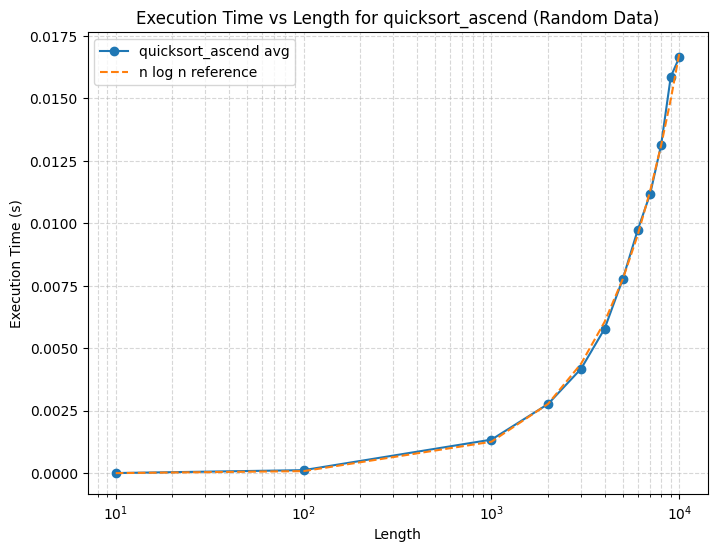

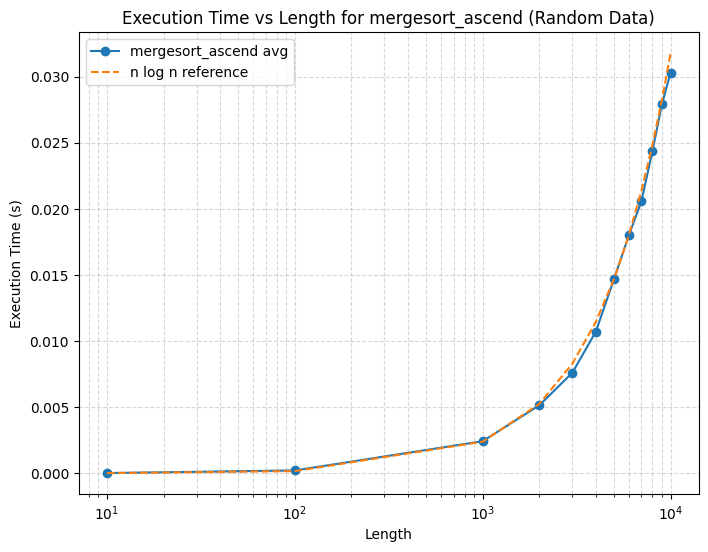

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# List of target algorithms for the comparison
target_algorithms = ["quicksort_ascend", "mergesort_ascend"]

# Dictionary to store execution times by length and algorithm
results_by_length = defaultdict(lambda: defaultdict(list))

# Extract only 'random' type entries with length between 10^3 and 10^4
for key, entry in data.items():
    if entry.get("type") != "random":
        continue
    length = entry.get("length")
    if not (10 <= length <= 10000):
        continue
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# Get sorted list of lengths
lengths = sorted(results_by_length.keys())

def compute_avg_times(alg):
    avg_times = []
    for length in lengths:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_times.append(avg_time)
    return avg_times

for alg in target_algorithms:
    avg_times = compute_avg_times(alg)
    
    # Convert lengths to a NumPy array for computation
    lengths_array = np.array(lengths, dtype=float)
    
    # Compute a scaled n log n curve:
    # Scale factor is chosen so that the n log n curve roughly matches the median average execution time.
    if len(lengths_array) > 0 and avg_times[len(lengths_array)//2] is not None:
        median_length = lengths_array[len(lengths_array)//2]
        scaling = avg_times[len(lengths_array)//2] / (median_length * np.log(median_length))
    else:
        scaling = 1.0
    nlogn_curve = scaling * lengths_array * np.log(lengths_array)
    
    # Plot the average execution time and the reference n log n curve
    plt.figure(figsize=(8, 6))
    plt.plot(lengths, avg_times, marker='o', label=f"{alg} avg")
    plt.plot(lengths, nlogn_curve, label="n log n reference", linestyle='--')
    plt.xlabel("Length")
    plt.ylabel("Execution Time (s)")
    plt.title(f"Execution Time vs Length for {alg} (Random Data)")
    plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.legend()
    plt.show()


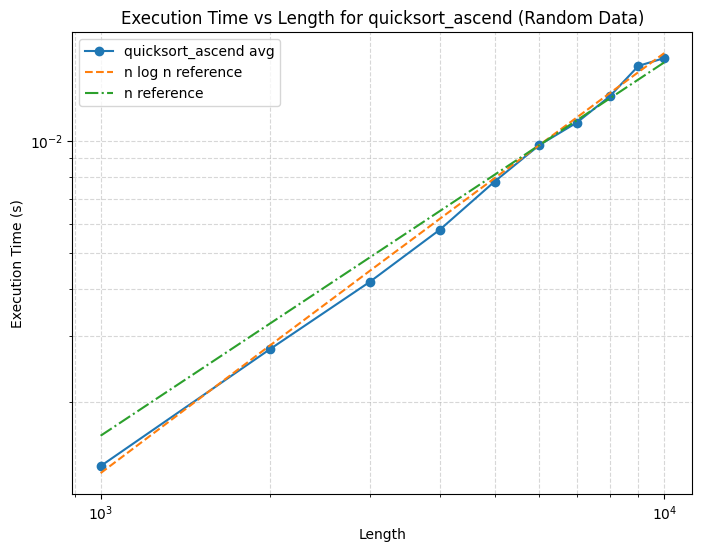

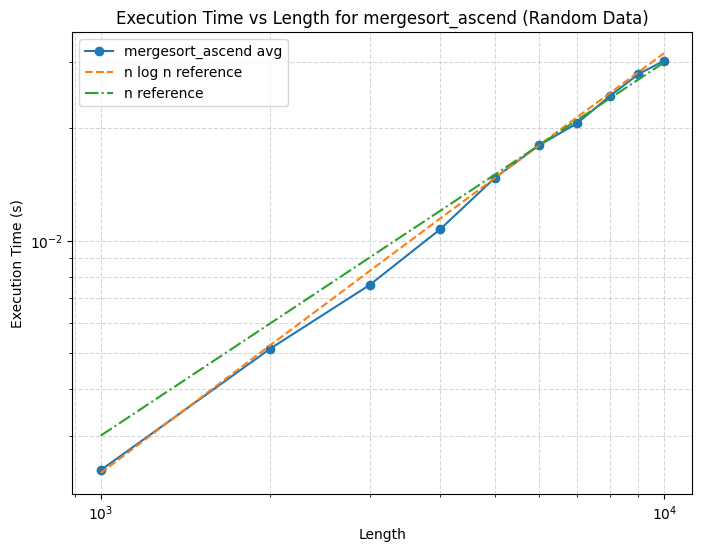

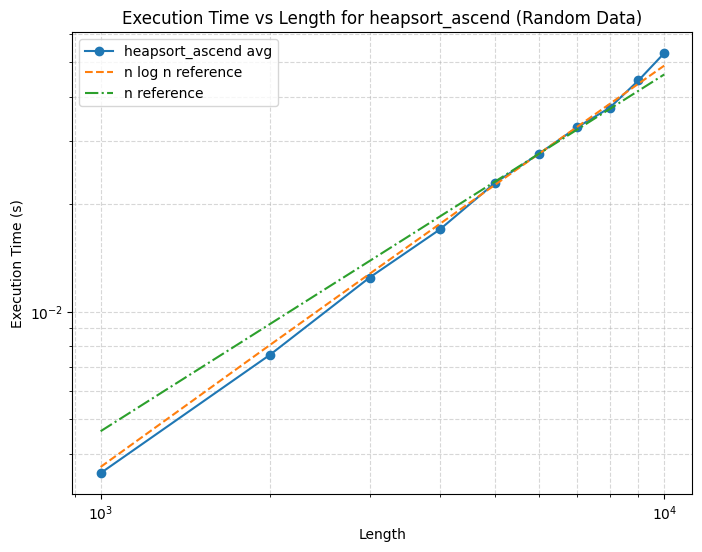

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Target algorithms for which to generate the plots
target_algorithms = ["quicksort_ascend", "mergesort_ascend", "heapsort_ascend"]

# Dictionary to store execution times by length and algorithm
results_by_length = defaultdict(lambda: defaultdict(list))

# Extract only 'random' type entries with length between 10^3 and 10^4
for key, entry in data.items():
    if entry.get("type") != "random":
        continue
    length = entry.get("length")
    if not (1000 <= length <= 10000):
        continue
    for alg, time in entry["result"].items():
        results_by_length[length][alg].append(time)

# Get a sorted list of lengths
lengths = sorted(results_by_length.keys())

def compute_avg_times(alg):
    avg_times = []
    for length in lengths:
        times = results_by_length[length][alg]
        avg_time = np.mean(times) if times else None
        avg_times.append(avg_time)
    return avg_times

# Loop over each target algorithm and create its plot
for alg in target_algorithms:
    avg_times = compute_avg_times(alg)
    lengths_array = np.array(lengths, dtype=float)
    
    # Choose a reference point for scaling based on the median length value
    median_index = len(lengths_array) // 2
    median_length = lengths_array[median_index]
    median_avg_time = avg_times[median_index] if avg_times[median_index] is not None else 1.0
    
    # Scaling factors for reference curves
    scaling_nlogn = median_avg_time / (median_length * np.log(median_length))
    scaling_n = median_avg_time / median_length
    
    # Compute reference curves for O(n log n) and O(n)
    nlogn_curve = scaling_nlogn * lengths_array * np.log(lengths_array)
    n_curve = scaling_n * lengths_array
    
    # Plot the average execution time and the reference curves
    plt.figure(figsize=(8, 6))
    plt.plot(lengths, avg_times, marker='o', label=f"{alg} avg")
    plt.plot(lengths, nlogn_curve, linestyle='--', label="n log n reference")
    plt.plot(lengths, n_curve, linestyle='-.', label="n reference")
    
    plt.xlabel("Length")
    plt.ylabel("Execution Time (s)")
    plt.title(f"Execution Time vs Length for {alg} (Random Data)")
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.legend()
    plt.show()
